<a href="https://colab.research.google.com/github/GRACENGARI/INSURANCE-ANALYSIS/blob/main/medicalinsurance2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/insurance.xls")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


DATA EXPLORATION

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
df.shape

(1338, 7)

CHECKING FOR DUPLICATES

In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
df.duplicated().sum()

1

In [10]:
duplicate=df[df.duplicated(keep="last")]
duplicate

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631


In [11]:
df=df.drop_duplicates()

In [12]:
df.duplicated().sum()

0

check for missing values

In [13]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

EXPLORATORY DATA ANALYSIS

In [15]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

DESCRIPTIVE STATITISTICS

In [16]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


Text(0.5, 0, 'BMI')

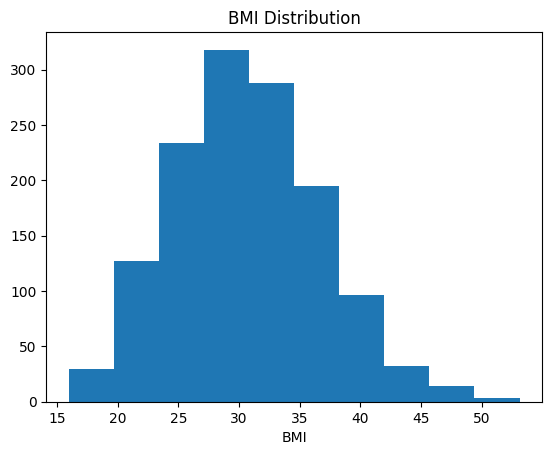

In [18]:
plt.hist(df["bmi"])
plt.title("BMI Distribution" )
plt.xlabel("BMI")

BMI NORMALLY DISTRIBUTED

GENDER DISTRIBUTION

Text(0.5, 1.0, 'Gender Ratio')

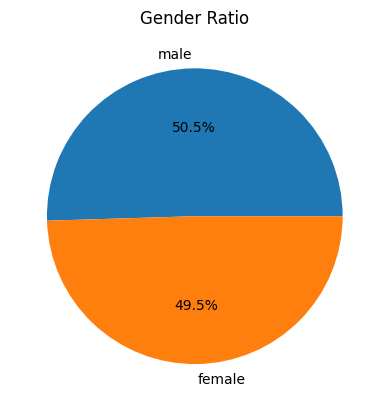

In [20]:
gender_rate=df['sex'].value_counts()
plt.pie(gender_rate.values,labels=gender_rate.index,autopct="%1.1f%%")
plt.title("Gender Ratio")

DOES THE BMI AFFECT THE CHARGES

Text(0.5, 1.0, 'BMI VS Charges')

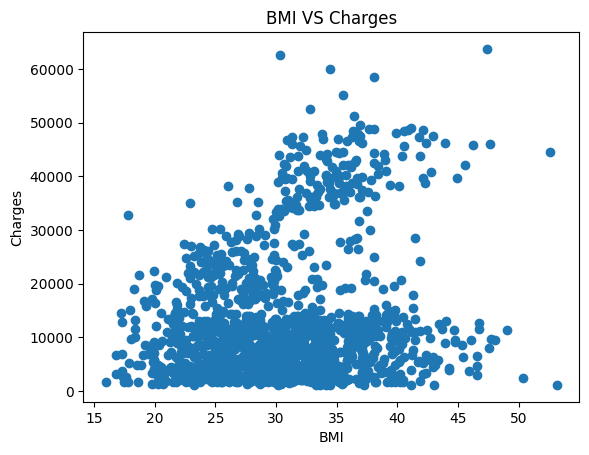

In [21]:
plt.scatter(x=df['bmi'],y=df["charges"])
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.title("BMI VS Charges")

There is a positive relationship between BMI and charges ie the higher the bmi the higher the charges

DOES NUMBER OF CHILDREN AFFECT THE INSURANCE CHARGES

Text(0, 0.5, 'charges')

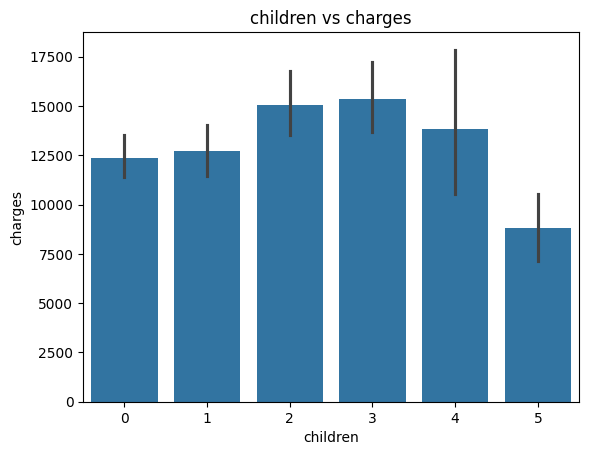

In [23]:
sns.barplot(x="children",y="charges",data=df)
plt.title("children vs charges")
plt.xlabel("children")
plt.ylabel("charges")

from the vizualization above no of children does not affect charges

Does smoking have an effect on insurance charges

Text(0, 0.5, 'charges')

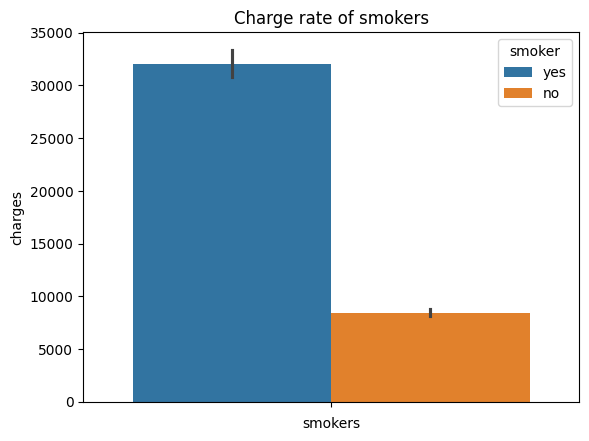

In [26]:
sns.barplot(y="charges",hue="smoker",data=df)
plt.title("Charge rate of smokers")
plt.xlabel("smokers")
plt.ylabel("charges")

This shows smokers pay high insurance charges than non smokers

WHICH REGIONS PAY HIGH CHARGES

Text(0, 0.5, 'charges')

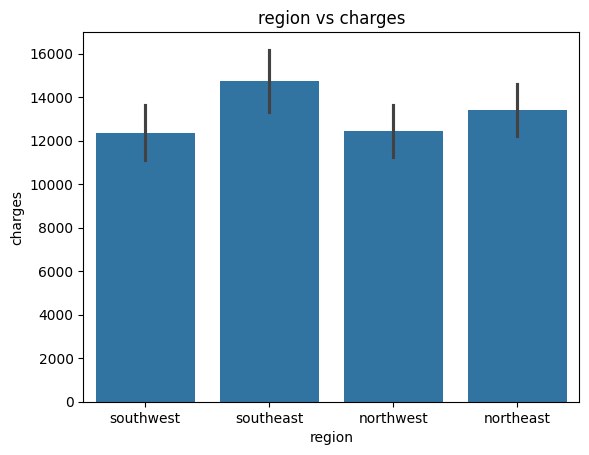

In [27]:
sns.barplot(x="region",y="charges",data=df)
plt.title("region vs charges")
plt.xlabel("region")
plt.ylabel("charges")

Southeast pays the highest charges

CORRELATION BETWEEN NUMERICAL DATA

<ipython-input-28-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

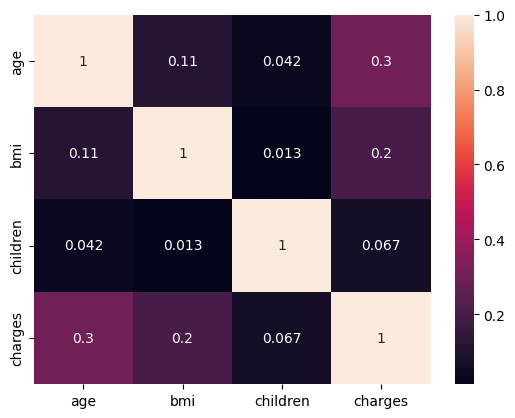

In [28]:
sns.heatmap(df.corr(),annot=True)

age and charges have the highest corelation